In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [24]:
data = pd.read_csv('UK_monthly_gdp.csv')

In [25]:
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


In [26]:
data.shape

(36, 2)

In [27]:
data.isnull().sum()

Time Period    0
GDP Growth     0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Period  36 non-null     object 
 1   GDP Growth   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


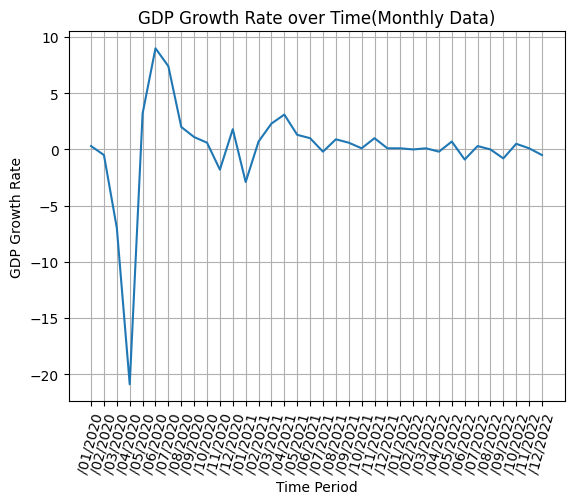

In [29]:
plt.plot(data['Time Period'], data['GDP Growth'])
plt.xlabel('Time Period')
plt.ylabel('GDP Growth Rate')
plt.xticks(rotation = 75)
plt.title('GDP Growth Rate over Time(Monthly Data)')
plt.grid(True)

plt.show()

April 2020 , steep downfall in GDP of UK.
Then in June 2020 able to see the maximum rise in GDP within 3 years (2020-2022)

In [30]:
fig = go.Figure(data=go.Heatmap(
                   z=[data['GDP Growth']],
                   x=data.index,
                   y=['GDP Growth'],
                   colorscale='Viridis'))

fig.update_layout(title='GDP Growth over Time',
                  xaxis_title='Time Period',
                  yaxis_title='')

fig.show()

As a recession means the decline in the circulation of money for two consecutive quarters, we will convert our monthly data into quarterly data to analyze the recession

In [31]:
# Converting monthly data to quarterly data using resample method

data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()

In [32]:
quarterly_data.head()

,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


In [33]:
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

In [34]:
quarterly_data['Recession'].fillna(False, inplace=True)

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index,
                         y=quarterly_data['GDP Growth'],
                         name='GDP Growth',
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index,
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'],
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

The red line shows the periods of negative GDP growth (considered recessions), and the green line shows the overall trend in GDP growth over time.

Now we analyze the severity of the recession. The severity of a recession refers to the extent to which the economy contracts during a recession. A severe recession involves a deeper and more prolonged decline in economic activity, resulting in negative effects on employment, incomes and other economic indicators.

In [36]:
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()